<a href="https://colab.research.google.com/github/danielsabino/ppgti3007_cv_2021_2/blob/semana04/semana04/aula07/%5Bnotebook%5Dcv_w04_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Referência do notebook: https://python.plainenglish.io/part-2-transfer-learning-with-pytorch-cnns-for-beginners-2b5d247ac311

<h1>Creating a Custom Classification Model With ResNet18</h1>
<hr>

<h1> Preparation </h1>

These are the modules you will need to use in this Colab.

In [1]:
#Import Statements
#PyTorch modules

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader


#Glob is used to grab files from a directory
import glob

#PIL is used to help load images
from PIL import Image
#tqdm is a progress bar for us to refer to while training
from tqdm import tqdm
#matplotlib.pyplot will allow us to plot out our training and validation loss 
import matplotlib.pyplot as plt
#Imshow will allow us to show our images
from matplotlib.pyplot import imshow

Checking to see if GPU is avaliable for acceleration.

In [2]:
#Check if Google Colab has a GPU avaliable
#If not, you should click Runtime on the menu bar, click Change Runtime type, and use a GPU
torch.cuda.is_available()

True

<hr>


<h1> Step 1: Load the Data </h1>

In [3]:
#!pip install gdown
#import gdown
#Use Gdown to download the validation dataset
#url = "https://drive.google.com/uc?id=1caDIHeJ0jQJNOWNyXl2ODGGLoP1SZJrj"
#output = "validation.zip"
#gdown.download(url, output, quiet=False)


Adaptação do notebook original para baixar os dados direto.

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1caDIHeJ0jQJNOWNyXl2ODGGLoP1SZJrj' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1caDIHeJ0jQJNOWNyXl2ODGGLoP1SZJrj" -O '/content/validation.zip' && rm -rf /tmp/cookies.txt

--2022-03-03 18:12:52--  https://docs.google.com/uc?export=download&confirm=t&id=1caDIHeJ0jQJNOWNyXl2ODGGLoP1SZJrj
Resolving docs.google.com (docs.google.com)... 142.251.8.113, 142.251.8.138, 142.251.8.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.8.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/01mhfe347ajifjp8gt7kijq4eskqplf9/1646331150000/06749631020377743695/*/1caDIHeJ0jQJNOWNyXl2ODGGLoP1SZJrj?e=download [following]
--2022-03-03 18:12:52--  https://doc-04-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/01mhfe347ajifjp8gt7kijq4eskqplf9/1646331150000/06749631020377743695/*/1caDIHeJ0jQJNOWNyXl2ODGGLoP1SZJrj?e=download
Resolving doc-04-68-docs.googleusercontent.com (doc-04-68-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-04-68-docs.googleusercontent.com (doc-04-68-do

In [ ]:
##Use Gdown to download the training dataset
#url = "https://drive.google.com/uc?id=1Y0gpp-rHG91o3xtGBfda4uavXUOis6C5"
#output = "train.zip"
#gdown.download(url, output, quiet=False)

Adaptação do notebook original para baixar os dados direto.

In [5]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y0gpp-rHG91o3xtGBfda4uavXUOis6C5' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Y0gpp-rHG91o3xtGBfda4uavXUOis6C5" -O '/content/train.zip' && rm -rf /tmp/cookies.txt

--2022-03-03 18:13:00--  https://docs.google.com/uc?export=download&confirm=t&id=1Y0gpp-rHG91o3xtGBfda4uavXUOis6C5
Resolving docs.google.com (docs.google.com)... 142.251.8.139, 142.251.8.100, 142.251.8.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.8.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/iq1u6nmckpel0gnv2u08ukdco1unv6ji/1646331150000/06749631020377743695/*/1Y0gpp-rHG91o3xtGBfda4uavXUOis6C5?e=download [following]
--2022-03-03 18:13:00--  https://doc-04-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/iq1u6nmckpel0gnv2u08ukdco1unv6ji/1646331150000/06749631020377743695/*/1Y0gpp-rHG91o3xtGBfda4uavXUOis6C5?e=download
Resolving doc-04-68-docs.googleusercontent.com (doc-04-68-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-04-68-docs.googleusercontent.com (doc-04-68-do

In [6]:
#Unzip the validation zip file.
!unzip -q validation.zip

In [7]:
#Unzip the training zip file.
!unzip -q train.zip

Choosing what device to use depending on whether or not there is GPU avaliable. The default setting is CPU.

In [8]:
#Loading the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
#Create a list of our detection classes
classes = ["Car", "Bicycle", "Person", "Airplane"]

Create a Data class to hold our data and corresponding labels. We can pass instances of this Data class into our dataLoaders, which will help turn our Data class into an iterable. Our class must inherit from PyTorch's Dataset class. 

In [10]:
#Create a Data class to hold the data and corresponding class labels
class Data(Dataset):
    #Create the constructor for the Data class (training: Whether or not to get validation or training data), (transform: What type of transformation to apply to images)
    def __init__(self, training=True, transform=True):
        #Data samples
        self.x = []

        #Data labels
        self.y = []

        #Classes for the labels
        self.classes = ["Car", "Bicycle", "Person", "Airplane"]

        if transform:
            #Create a object containing series of transformations
            self.transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5), transforms.Resize(224), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])
        else:
            #Create a object containing series of transformations
            self.transform = transforms.Compose([transforms.Resize(224), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])
            
        #Iterate over the class list 
        for index, c in enumerate(self.classes):
            #Grab the training dataset by adding all the file paths to self.x
            #Grab the corresponding labels by adding the index of each class to self.y
            if training:
                temp = glob.glob(f"./train/{c}/*")
                self.x.extend(temp)
                self.y.extend([index for i in range(len(temp))])

            #Grab the validation dataset by adding all the file paths to self.x
            #Grab the corresponding labels by adding the index of each class to self.y
            else:
                temp = glob.glob(f"./validation/{c}/*")
                self.x.extend(temp)
                self.y.extend([index for i in range(len(temp))])

    #Return the length of the Data if len() is called on it  
    def __len__(self):
        return len(self.x)
    
    #Handles what happens when something tries to access indices of the Data class
    #This is needed for the DataLoaders
    def __getitem__(self, idx):
        x = Image.open(self.x[idx]).convert('RGB')
        x = self.transform(x)
        return x,self.y[idx]
        
#Create training instance of the Data class   
training = Data()
#Create validation instance of the Data class   
validation = Data(False, False)

#Dataloader for training samples
trainloader = DataLoader(dataset = training, batch_size = 32, shuffle = True)
#Dataloader for validation samples
validationloader = DataLoader(dataset = validation, batch_size = 32, shuffle = True)



<hr>

<h1>Step 2: Create the model</h1>

In [11]:
#Function to create a Pretrained Resnet Model with a Fully Connected Layer
# (out_1: ouput of 1st layer), (out_2: ouput of 2nd layer)
def createModel(out_1, out_2):
    #Loading ResNet18
    model = torchvision.models.resnet18(pretrained = True)

    #Freeze all of the weights in ResNet18
    for param in model.parameters():
        param.requires_grad = False

    #Creating 3 Linear connected layers which can be trained
    fc1 = nn.Linear(512, out_1)
    fc2 = nn.Linear(out_1, out_2)
    fc3 = nn.Linear(out_2, 4)

    layers = [fc1, fc2, fc3]
    for linearLayer in layers:
        #Applying He initialization to all layers
        nn.init.kaiming_uniform_(linearLayer.weight, nonlinearity='leaky_relu')
    


    #Setting Resnet's fully connected layer to our collection of three Linear layers with nn.Sequential
    model.fc = nn.Sequential(fc1, nn.LeakyReLU(),fc2, nn.LeakyReLU(),fc3)
    #Sending the device to the GPU if avaliable
    model.to(device)

    return model

In [12]:
# showing the model architecture
import torchsummary as summary

model = createModel(256, 128)
summary.summary(model,(3,224,224))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

<hr>
<h1> Step 3: Train the Model (this may take a while) </h1>

In [13]:
#Function to handle training
#(model: model to train), (criterion: loss function for the model), (optimizer, what optimizer to use)
def train(model, criterion, optimizer, file, epochs=9, trainLoss=[], validationLoss=[]):
    print("Starting training")
    for epoch in range(epochs):
        print(f"Epoch Number: {epoch}")

        testAccuracy = 0
        totalLoss = 0
        for x, y in tqdm(trainloader):
            #Put model into training mode
            model.train()
            #Send tensors to GPU if available for faster processing
            x, y = x.to(device), y.to(device)
            #Zero out gradients
            optimizer.zero_grad()
            #Make a prediction
            y_hat = model(x)
            #Calculate the loss
            l = criterion(y_hat, y)
            #Update the total loss
            totalLoss += l.item()
            #Initiate backpropagation
            l.backward()
            
            #Update parameters
            optimizer.step()

            #Grab the index with the largest probability from y_hat
            y_hat = torch.argmax(y_hat, 1)
          
            testAccuracy += (y_hat == y).sum().item()
        trainLoss.append(totalLoss)
        print(f"Training Accuracy: {testAccuracy / len(training)}")
        
        valAccuracy = 0
        totalLoss = 0
        for x_val, y_val in validationloader:
            # Put the model into evaluation mode
            model.eval()
            # Send the evaluation tensors to the GPU if it's available
            x_val, y_val = x_val.to(device), y_val.to(device)
            #Calculate loss to keep track of validation loss
            l = criterion(model(x_val), y_val)
            totalLoss += l
            #Grab the index with the largest probability from the model's output
            y_hat = torch.argmax(model(x_val), 1)
            valAccuracy += (y_hat == y_val).sum().item()
        print(f"Validation Accuracy: {valAccuracy / len(validation)}")
        validationLoss.append(totalLoss)
        #Save our model for each epoch
        torch.save(model.state_dict(), file)
        
    return trainLoss, validationLoss, model

#Create a model using our function
model = createModel(256, 128)
#Define our loss and optimizers
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0025)
#Specify output file name
file = "ResnetFinal.pth"

#Try to use Colab's GPU here, otherwise it will take a long time to train.
output = train(model, criterion, optimizer, file)

Starting training
Epoch Number: 0


100%|██████████| 125/125 [01:37<00:00,  1.28it/s]


Training Accuracy: 0.72125
Validation Accuracy: 0.8988566402814424
Epoch Number: 1


100%|██████████| 125/125 [01:36<00:00,  1.30it/s]


Training Accuracy: 0.81975
Validation Accuracy: 0.8953386103781882
Epoch Number: 2


100%|██████████| 125/125 [01:36<00:00,  1.30it/s]


Training Accuracy: 0.817
Validation Accuracy: 0.9102902374670184
Epoch Number: 3


100%|██████████| 125/125 [01:36<00:00,  1.30it/s]


Training Accuracy: 0.8365
Validation Accuracy: 0.8970976253298153
Epoch Number: 4


100%|██████████| 125/125 [01:36<00:00,  1.30it/s]


Training Accuracy: 0.853
Validation Accuracy: 0.9270008795074758
Epoch Number: 5


100%|██████████| 125/125 [01:36<00:00,  1.30it/s]


Training Accuracy: 0.851
Validation Accuracy: 0.911169744942832
Epoch Number: 6


100%|██████████| 125/125 [01:35<00:00,  1.31it/s]


Training Accuracy: 0.8535
Validation Accuracy: 0.9190853122251539
Epoch Number: 7


100%|██████████| 125/125 [01:37<00:00,  1.29it/s]


Training Accuracy: 0.86625
Validation Accuracy: 0.9190853122251539
Epoch Number: 8


100%|██████████| 125/125 [01:37<00:00,  1.29it/s]


Training Accuracy: 0.862
Validation Accuracy: 0.9085312225153914


<hr>

<h1>Step 4: Plot Losses & Test

In [47]:
output_tmp = [i.cpu().detach().numpy() for i in output[1]]

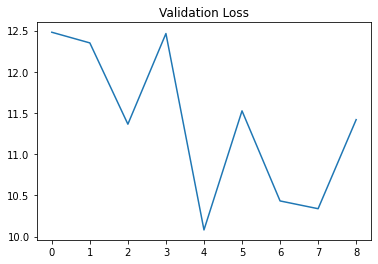

In [48]:
plt.plot(output_tmp)
plt.title("Validation Loss")
plt.show()

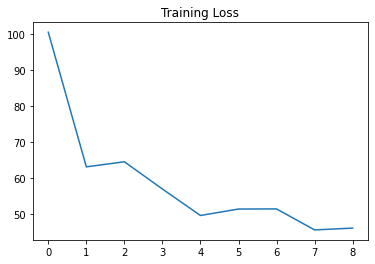

In [49]:
plt.plot(output[0])
plt.title("Training Loss")
plt.show()

In [50]:
#Create a function to show an image
#(img: tensor of (C, H, W))
def showImage(img, truth):
  transform = transforms.ToPILImage()
  imshow(transform(img))
  plt.title(f"True Label: {classes[truth]}")

In [ ]:
#Download the weights I obtained previously during training
#gdown.download("https://drive.google.com/uc?id=1gPEzy6K6PxuEQzh0YofLYEr_5L9G84Wh", "preTrainedWeights.pth", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1gPEzy6K6PxuEQzh0YofLYEr_5L9G84Wh
To: /content/preTrainedWeights.pth
45.4MB [00:00, 77.9MB/s]


'preTrainedWeights.pth'

In [53]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gPEzy6K6PxuEQzh0YofLYEr_5L9G84Wh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1gPEzy6K6PxuEQzh0YofLYEr_5L9G84Wh" -O '/content/preTrainedWeights.pth' && rm -rf /tmp/cookies.txt

--2022-03-03 18:57:57--  https://docs.google.com/uc?export=download&confirm=t&id=1gPEzy6K6PxuEQzh0YofLYEr_5L9G84Wh
Resolving docs.google.com (docs.google.com)... 64.233.189.138, 64.233.189.100, 64.233.189.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4apn23dilf35vdpr0fncvosklm5l3vgl/1646333850000/06749631020377743695/*/1gPEzy6K6PxuEQzh0YofLYEr_5L9G84Wh?e=download [following]
--2022-03-03 18:57:57--  https://doc-10-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4apn23dilf35vdpr0fncvosklm5l3vgl/1646333850000/06749631020377743695/*/1gPEzy6K6PxuEQzh0YofLYEr_5L9G84Wh?e=download
Resolving doc-10-68-docs.googleusercontent.com (doc-10-68-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-10-68-docs.googleusercontent.com (doc-10-6

In [54]:
import random
model = createModel(256, 128)

#You can choose to load the weights I obtained previously through training, or you can choose to load the weights obtained through training above (ResnetFinal.pth)
def loadWeights(model, path):
  #Check if GPU is available
  if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
  else:
    map_location='cpu'

  #Load the weights for the model
  model.load_state_dict(torch.load(path, map_location=map_location))

#loadWeights(model, "preTrainedWeights.pth")
loadWeights(model, "ResnetFinal.pth")


AI's prediction: Airplane


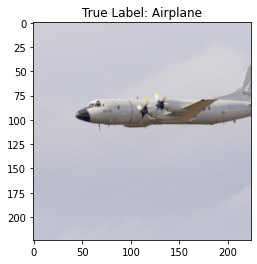

In [58]:
#Turn model into evaluation mode for testing
model.eval()

randomIndex = random.randint(0, len(validation) - 1)

selection = validation[randomIndex][0]
selectionLabel = validation[randomIndex][1]

#Un-normalize data for visualization
mean = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
std = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)

unnormalized = selection * std[:, None, None] + mean[:, None, None]

#Convert image into (B,C,H,W)
image = selection.view(-1, 3, 224, 224).to(device)
output = model(image)

#Show the unnormalized image & label
showImage(unnormalized, selectionLabel)
print("")
#Show the CNN's prediction
print(f"AI's prediction: {classes[torch.argmax(output, 1).detach().item()]}")

<hr>


<h1>Final Notes</h1>


Thanks for making it this far! I hope that this Colab has helped you gain a strong foundation in PyTorch!

To further improve your PyTorch skills, it's integral to build projects and continue practicing it. A good way to do this is through hackathons such as HackMIT or Facebook's AI hackathons. If you're a high school student, you can attend Explore Hacks, which is taking place in 2021 from July 23rd - July 25th. We hope to see you there!

For more information, please go to https://explorehacks.org
<a href="https://explorehacks.org">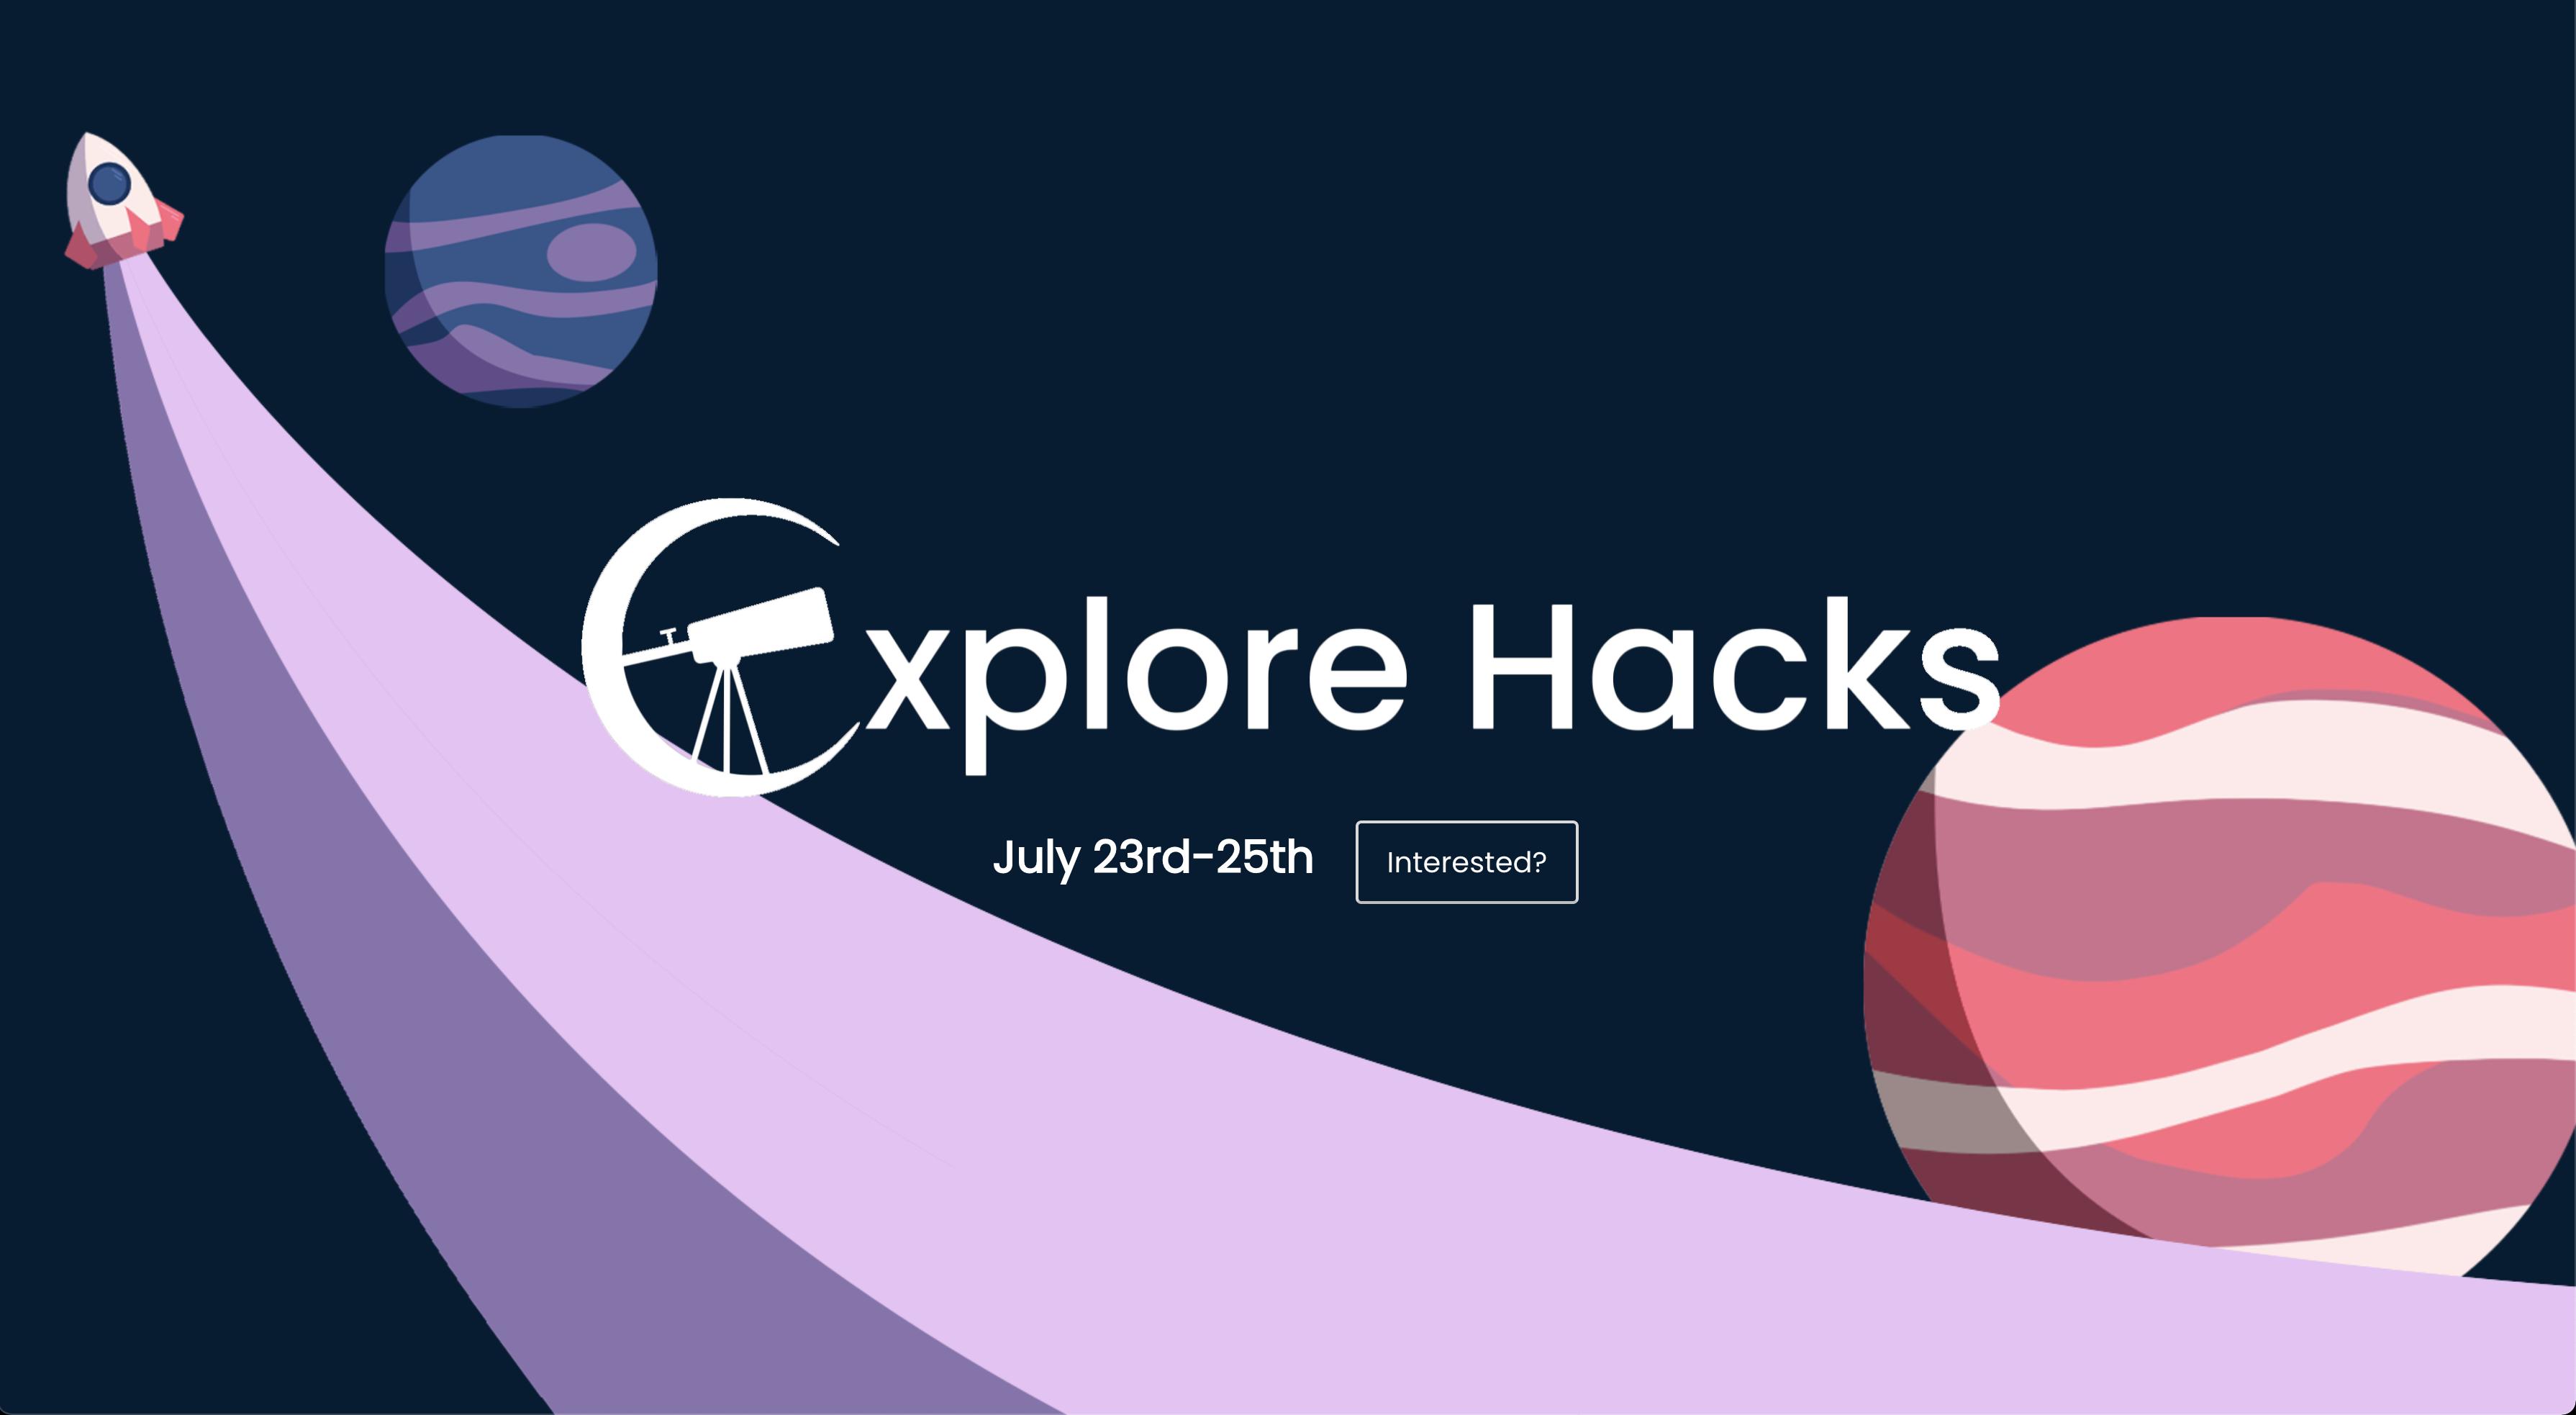</a>

<hr>

Dataset: https://storage.googleapis.com/openimages/web/index.html

ResNet: https://pytorch.org/hub/pytorch_vision_resnet/


Author:
Leo Xu